Importing required packages

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score
from textblob import TextBlob
%matplotlib inline

/Users/tanvirniaz/Documents/Python/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Loading the dataset

In [4]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df.head(5)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [5]:
df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


Missing value

In [6]:
count_missing = df.isnull().sum() 
count_missing.sort_values(ascending = False)

Title                      3810
Review Text                 845
Class Name                   14
Department Name              14
Division Name                14
Positive Feedback Count       0
Recommended IND               0
Rating                        0
Age                           0
Clothing ID                   0
Unnamed: 0                    0
dtype: int64

Dropping features and rows

In [7]:
df=df.dropna(how='any') #Dropping any reviews with missing fields

In [8]:
count_missing = df.isnull().sum() 
count_missing.sort_values(ascending = False)

Class Name                 0
Department Name            0
Division Name              0
Positive Feedback Count    0
Recommended IND            0
Rating                     0
Review Text                0
Title                      0
Age                        0
Clothing ID                0
Unnamed: 0                 0
dtype: int64

In [9]:
df=df.drop(df.columns[0], axis=1) #dropping redundant index column


In [10]:
df=df.reset_index()
df.head()

,index,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
1,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
2,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
3,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
4,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits


In [11]:
df['Clothing ID'].value_counts()

1078    871
862     658
1094    651
1081    487
829     452
872     450
1110    419
868     370
895     336
867     291
936     289
1095    287
850     280
1077    251
1059    247
863     243
1086    241
1080    241
860     237
1083    214
861     203
873     197
1033    190
927     187
1092    187
828     181
1056    180
820     177
836     172
1022    172
       ... 
232       1
120       1
105       1
104       1
88        1
56        1
1191      1
1175      1
1143      1
1127      1
568       1
584       1
600       1
648       1
89        1
73        1
41        1
25        1
9         1
1176      1
1160      1
1064      1
856       1
808       1
792       1
776       1
744       1
728       1
712       1
16        1
Name: Clothing ID, Length: 1095, dtype: int64

In [12]:
drop_elements=['index', 'Clothing ID']
df=df.drop(df[drop_elements], axis=1)

In [13]:
df.head()

,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
1,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
2,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
3,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
4,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits


In [14]:
df.describe()

,Age,Rating,Recommended IND,Positive Feedback Count
count,19662.000000,19662.000000,19662.000000,19662.000000
mean,43.260808,4.183145,0.818177,2.652477
std,12.258122,1.112224,0.385708,5.834285
min,18.000000,1.000000,0.000000,0.000000
25%,34.000000,4.000000,1.000000,0.000000
50%,41.000000,5.000000,1.000000,1.000000
75%,52.000000,5.000000,1.000000,3.000000
max,99.000000,5.000000,1.000000,122.000000


Visualizing

No handles with labels found to put in legend.


Text(0.5,1,'Age Distribution')

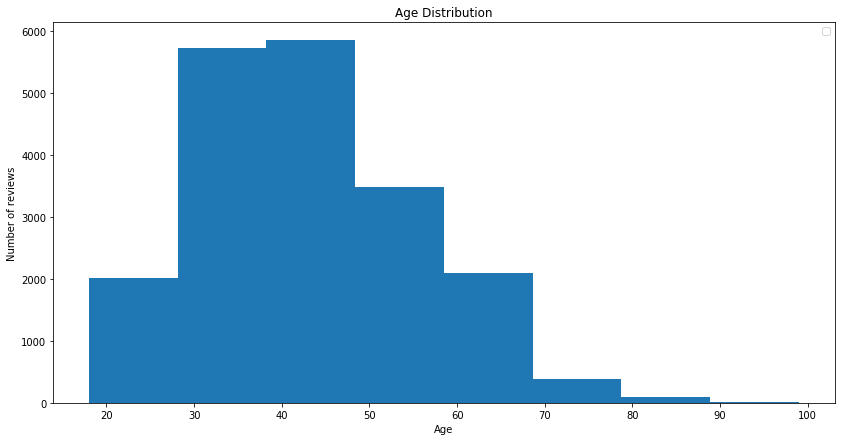

In [15]:
plt.figure(figsize=(14,7))
plt.hist(df['Age'],bins=8)
plt.xlabel('Age')
plt.ylabel('Number of reviews')
plt.legend()
plt.title('Age Distribution')

No handles with labels found to put in legend.


Text(0.5,1,'Rating Distribution')

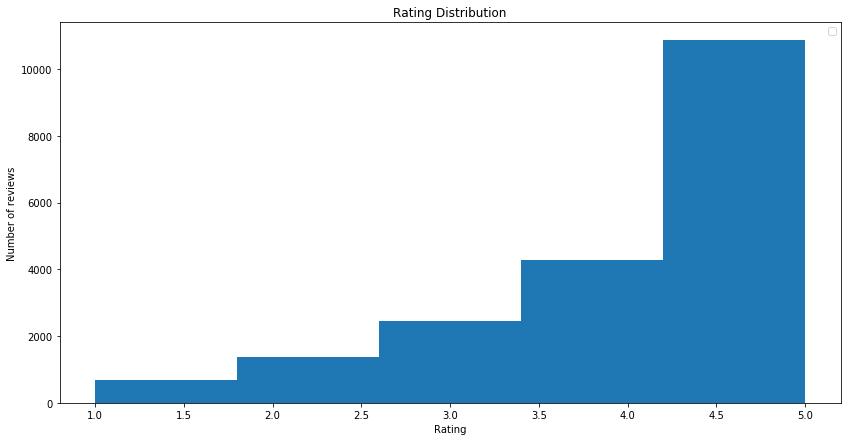

In [19]:
plt.figure(figsize=(14,7))
plt.hist(df['Rating'],bins=5)
plt.xlabel('Rating')
plt.ylabel('Number of reviews')
plt.legend()
plt.title('Rating Distribution')

Text(0.5,1,'Countplot of Recommendation')

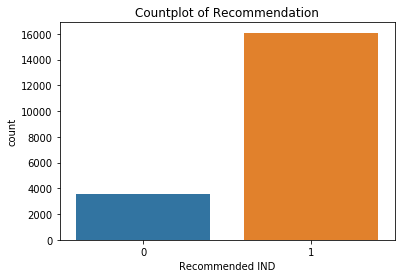

In [20]:
sns.countplot(x='Recommended IND',data=df)
plt.title ("Countplot of Recommendation")

Binning data and using text sentiment

In [43]:
df['Title Sentiment'] = df['Title'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['Review Sentiment'] = df['Review Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [44]:
df.head()

,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Title Sentiment,Review Sentiment
0,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.0625,0.073675
1,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.6250,0.550000
2,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.0000,0.512891
3,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,0.2000,0.178750
4,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,0.3000,0.133750


In [45]:
#split age and sentiment into bands based on range and std deviations
df['Age Grouped'] = pd.qcut(df['Age'], 4)
df['Title Grouped'] = pd.qcut(df['Title Sentiment'], 4)
df['Review Grouped'] = pd.qcut(df['Review Sentiment'], 4)

In [46]:
df.head()

,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Title Sentiment,Review Sentiment,Age Grouped,Title Grouped,Review Grouped
0,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.0625,0.073675,"(52.0, 99.0]","(0.0, 0.381]","(-0.976, 0.139]"
1,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.6250,0.550000,"(41.0, 52.0]","(0.381, 0.625]","(0.346, 1.0]"
2,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.0000,0.512891,"(41.0, 52.0]","(-1.001, 0.0]","(0.346, 1.0]"
3,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,0.2000,0.178750,"(41.0, 52.0]","(0.0, 0.381]","(0.139, 0.237]"
4,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,0.3000,0.133750,"(34.0, 41.0]","(0.0, 0.381]","(-0.976, 0.139]"


Feature selection

In [47]:
data_elements=['Recommended IND','Positive Feedback Count','Rating','Division Name', 'Class Name','Age Grouped','Title Grouped','Review Grouped']
data=df[data_elements]
data.head()

,Recommended IND,Positive Feedback Count,Rating,Division Name,Class Name,Age Grouped,Title Grouped,Review Grouped
0,0,0,3,General,Dresses,"(52.0, 99.0]","(0.0, 0.381]","(-0.976, 0.139]"
1,1,0,5,General Petite,Pants,"(41.0, 52.0]","(0.381, 0.625]","(0.346, 1.0]"
2,1,6,5,General,Blouses,"(41.0, 52.0]","(-1.001, 0.0]","(0.346, 1.0]"
3,0,4,2,General,Dresses,"(41.0, 52.0]","(0.0, 0.381]","(0.139, 0.237]"
4,1,1,5,General Petite,Knits,"(34.0, 41.0]","(0.0, 0.381]","(-0.976, 0.139]"


In [48]:
#label encode into categories
le = preprocessing.LabelEncoder() #Label encoding data for modeling
for column_name in data.columns:
    data[column_name] = le.fit_transform(data[column_name])
data.head()

/Users/tanvirniaz/Documents/Python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Recommended IND,Positive Feedback Count,Rating,Division Name,Class Name,Age Grouped,Title Grouped,Review Grouped
0,0,0,2,0,3,3,1,0
1,1,0,4,1,13,2,2,3
2,1,6,4,0,0,2,0,3
3,0,4,1,0,3,2,1,1
4,1,1,4,1,8,1,1,0


Training model

In [49]:
#Data split on label and features
x=data.iloc[:, 1:] #Data set features(without 'Recommended IND')
y=data.iloc[:, 0] #Data set label ('Recommended IND')
print (x.head())
print (y.head())

   Positive Feedback Count  Rating  Division Name  Class Name  Age Grouped  \
0                        0       2              0           3            3   
1                        0       4              1          13            2   
2                        6       4              0           0            2   
3                        4       1              0           3            2   
4                        1       4              1           8            1   

   Title Grouped  Review Grouped  
0              1               0  
1              2               3  
2              0               3  
3              1               1  
4              1               0  
0    0
1    1
2    1
3    0
4    1
Name: Recommended IND, dtype: int64


In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2) #Stratified test and train split

In [51]:
#Cross validation function to find mean accuracy of given model
def compute_score(clf,x,y,scoring='accuracy'):
    xval=cross_val_score(clf,x,y,cv=10,scoring=scoring)
    return np.mean(xval)

In [52]:
#Classifiers to try
classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LogisticRegression()]

In [53]:
#Setting log for classfier:accuracy
log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)
acc_dict = {}

In [ ]:
#Iterate for classifiers and compute accuracies
for clf in classifiers:
    name = clf.__class__.__name__
    clf.fit(x_train, y_train)
    acc = compute_score(clf,x_train,y_train,scoring='accuracy')
    if name in acc_dict:
        acc_dict[name] += acc
    else:
        acc_dict[name] = acc

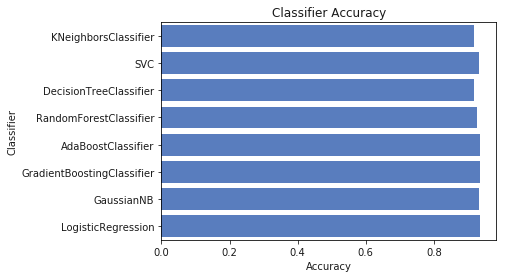

In [55]:
#Save to dataframe and plot model:accuracies
for clf in acc_dict:
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

Testing

In [56]:
print (max(acc_dict))

SVC


In [57]:
#Choosing SVC classfier (highest accuracy) to predict on test data
chosen_classifier= SVC()
chosen_classifier.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [58]:
#Accuracy of model
test_predictions = chosen_classifier.predict(x_test)
acc = accuracy_score(y_test, test_predictions)
print ("Accuracy: ", acc)

Accuracy:  0.9252479023646072


The SVC model attains a very high accuracy of 92.5% at predicting whether or not a user recommends a product or not based on the product review. The key business value would be correlating the text sentiments to certain age or product groups and analyzing what key review words show up in positive recommendations.